In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0      15.00
1      17.56
2      17.56
3      18.21
4      18.64
       ...  
391    67.99
392    72.25
393    81.52
394    80.15
395    73.03
Name: Temp, Length: 396, dtype: float64

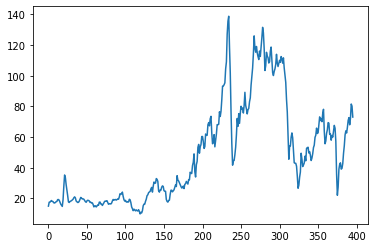

In [ ]:
import pandas as pd
df = pd.read_csv("drive/MyDrive/SLC price.csv")
import matplotlib.pyplot as plt
df1=df.reset_index()['Temp']
df["Date"]=pd.to_datetime(df["Date"])
plt.plot(df1)
df1

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

testlen=12
training_size=int(len(df1)-testlen)
test_size=testlen
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

time_step = 12
X_train, y_train = create_dataset(train_data, time_step)
#X_test, ytest = create_dataset(test_data, time_step)

print(X_train.shape), print(y_train.shape)
#print(X_test.shape), print(ytest.shape)

(371, 12)
(371,)


(None, None)

In [ ]:
X_train.shape

(371, 12)

In [ ]:
X_test= df1[-24:-12]
ytest = test_data

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(12,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=250,verbose=1)

Epoch 1/100
2/2 [==============================] - 17s 3s/step - loss: 0.1511 - val_loss: 0.2068
Epoch 2/100
2/2 [==============================] - 0s 147ms/step - loss: 0.1059 - val_loss: 0.2005
Epoch 3/100
2/2 [==============================] - 0s 158ms/step - loss: 0.0636 - val_loss: 0.1944
Epoch 4/100
2/2 [==============================] - 0s 116ms/step - loss: 0.0318 - val_loss: 0.1888
Epoch 5/100
2/2 [==============================] - 0s 101ms/step - loss: 0.0245 - val_loss: 0.1853
Epoch 6/100
2/2 [==============================] - 0s 112ms/step - loss: 0.0379 - val_loss: 0.1848
Epoch 7/100
2/2 [==============================] - 0s 129ms/step - loss: 0.0297 - val_loss: 0.1860
Epoch 8/100
2/2 [==============================] - 0s 128ms/step - loss: 0.0191 - val_loss: 0.1875
Epoch 9/100
2/2 [==============================] - 0s 158ms/step - loss: 0.0194 - val_loss: 0.1888
Epoch 10/100
2/2 [==============================] - 0s 101ms/step - loss: 0.0217 - val_loss: 0.1894
Epoch 11/10

In [ ]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
#%%
### Test Data RMSE
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
print(math.sqrt(mean_squared_error(ytest,test_predict)))



55.211473665776744


In [ ]:
mape = np.mean(np.abs((ytest - test_predict)/ytest))*100
print(mape)

79.05619262879875


In [ ]:
##Train data RMSE
y_train =scaler.inverse_transform(y_train.reshape(-1,1))
print(math.sqrt(mean_squared_error(y_train,train_predict)))
mape = np.mean(np.abs((y_train - train_predict)/y_train))*100
print(mape)

11.03592448154668
16.661199779094808


In [ ]:
test_predict

array([[15.164802 ],
       [14.830781 ],
       [14.009057 ],
       [13.4908085],
       [13.693012 ],
       [14.133246 ],
       [14.255119 ],
       [14.293012 ],
       [14.135917 ],
       [14.156143 ],
       [14.276933 ],
       [14.532986 ]], dtype=float32)

In [ ]:
ytest

array([[54.41],
       [61.42],
       [64.06],
       [62.67],
       [66.25],
       [70.82],
       [72.65],
       [67.99],
       [72.25],
       [81.52],
       [80.15],
       [73.03]])

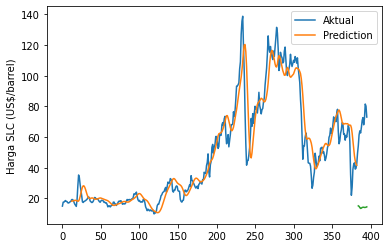

In [ ]:
#%%
### Plotting
# shift train predictions for plotting
look_back=12
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
train_pedict =
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label="Aktual")
plt.plot(trainPredictPlot,label="Prediction")
plt.plot(range(len(df1)-12,len(df1)),testPredictPlot)
plt.ylabel("Harga SLC (US$/barrel)")
plt.legend()
plt.show()

In [ ]:
train_predict.shape

(371, 1)

Text(0, 0.5, 'Harga SLC (US$/barrel)')

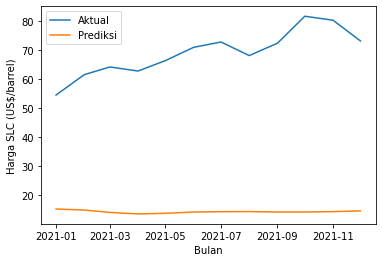

In [ ]:
dff = df[-12:]
plt.plot(dff["Date"],ytest,label="Aktual")
plt.plot(dff["Date"],test_predict,label="Prediksi")
plt.legend()
plt.xlabel("Bulan")
plt.ylabel("Harga SLC (US$/barrel)")

In [ ]:
x_input=test_data.reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=12
i=0
while(i<12):

    if(len(temp_input)>12):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.54052657]
13
1 day input [0.39981368 0.42030898 0.40951789 0.43731077 0.47278938 0.48699635
 0.45081904 0.483891   0.55585746 0.54522164 0.48994643 0.54052657]
1 day output [[0.54961795]]
2 day input [0.42030898 0.40951789 0.43731077 0.47278938 0.48699635 0.45081904
 0.483891   0.55585746 0.54522164 0.48994643 0.54052657 0.54961795]
2 day output [[0.5590541]]
3 day input [0.40951789 0.43731077 0.47278938 0.48699635 0.45081904 0.483891
 0.55585746 0.54522164 0.48994643 0.54052657 0.54961795 0.55905408]
3 day output [[0.5678682]]
4 day input [0.43731077 0.47278938 0.48699635 0.45081904 0.483891   0.55585746
 0.54522164 0.48994643 0.54052657 0.54961795 0.55905408 0.56786817]
4 day output [[0.57444817]]
5 day input [0.47278938 0.48699635 0.45081904 0.483891   0.55585746 0.54522164
 0.48994643 0.54052657 0.54961795 0.55905408 0.56786817 0.57444817]
5 day output [[0.5812277]]
6 day input [0.48699635 0.45081904 0.483891   0.55585746 0.54522164 0.48994643
 0.54052657 0.54961795 0.55905408 0

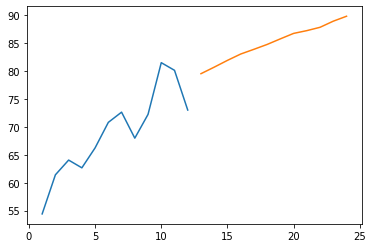

In [ ]:
day_new=np.arange(1,13)
day_pred=np.arange(13,25)
len(df1)
plt.plot(day_new,scaler.inverse_transform(df1[384:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


In [ ]:
day_pred,scaler.inverse_transform(lst_output)

(array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]), array([[79.54522734],
        [80.71628764],
        [81.93175562],
        [83.06709938],
        [83.91466856],
        [84.78794259],
        [85.79017083],
        [86.76671726],
        [87.26413842],
        [87.86262849],
        [88.96005222],
        [89.84266998]]))

Text(0, 0.5, 'Harga SLC (US$/barrel)')

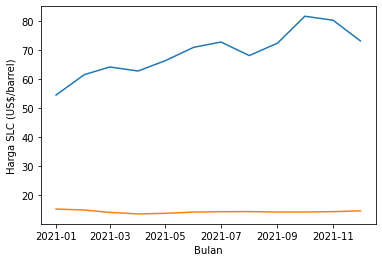

In [ ]:
dff = df[-12:]
plt.plot(dff["Date"],ytest,label="Aktual")
plt.plot(dff["Date"],test_predict,label="Prediksi")
plt.xlabel("Bulan")
plt.ylabel("Harga SLC (US$/barrel)")

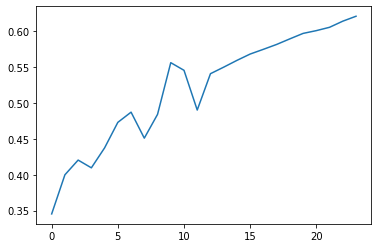

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[384:])





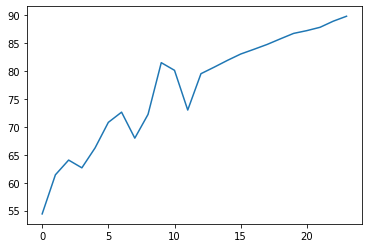

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3[384:])